# Анализ бизнес показателей развлекательного приложения<br> Procrastinate Pro+

**Цели и задачи проекта**

Заказчик – развлекательное приложение Procrastinate Pro+. Цель проекта – выделить причины неэффективного привлечения пользователей на основе данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года,а также сформулировать рекомендациии для отдела маркетинга.

**План работы**
- загрузка и предобработка данных;
- написание функций для расчёта и анализа LTV, ROI, удержания и конверсии;
- исследовательский анализ (создание профилей пользователей; откуда приходят пользователи и какими устройствами они пользуются)
- маркетинг(сколько стоит привлечение пользователей из различных рекламных каналов)
- оценка окупаемости рекламы (сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются, какие факторы мешают привлечению клиентов)
- рекомендации для отдела маркетинга

**Исходные данные**

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчёта и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Создание-профилей-пользователей" data-toc-modified-id="Создание-профилей-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание профилей пользователей</a></span></li><li><span><a href="#Доля-платящих-пользователей-для-разных-стран" data-toc-modified-id="Доля-платящих-пользователей-для-разных-стран-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Доля платящих пользователей для разных стран</a></span></li><li><span><a href="#Доля-платящих-пользователей-для-разных-устройств" data-toc-modified-id="Доля-платящих-пользователей-для-разных-устройств-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Доля платящих пользователей для разных устройств</a></span></li><li><span><a href="#Доля-платящих-пользователей-для-разных-рекламных-источников" data-toc-modified-id="Доля-платящих-пользователей-для-разных-рекламных-источников-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Доля платящих пользователей для разных рекламных источников</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Общая-сумма-расходов-на-маркетинг" data-toc-modified-id="Общая-сумма-расходов-на-маркетинг-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая сумма расходов на маркетинг</a></span></li><li><span><a href="#Распределение-трат-по-рекламным-источникам" data-toc-modified-id="Распределение-трат-по-рекламным-источникам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Распределение трат по рекламным источникам</a></span></li><li><span><a href="#Визуализация-динамики-изменения-расходов-во-времени" data-toc-modified-id="Визуализация-динамики-изменения-расходов-во-времени-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Визуализация динамики изменения расходов во времени</a></span></li><li><span><a href="#Средняя-стоимость-привлечения-пользователя-для-разных-источников" data-toc-modified-id="Средняя-стоимость-привлечения-пользователя-для-разных-источников-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя стоимость привлечения пользователя для разных источников</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Окупаемость-рекламы" data-toc-modified-id="Окупаемость-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Окупаемость рекламы</a></span></li><li><span><a href="#Конверсия-и-удержание" data-toc-modified-id="Конверсия-и-удержание-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Конверсия и удержание</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-устройствам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-странам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-каналам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-каналам-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по каналам</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка и предобработка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#открываем файлы
try:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), #визиты
    pd.read_csv('/datasets/orders_info_short.csv'), #заказы
    pd.read_csv('/datasets/costs_info_short.csv') #расходы на рекламу
    )
except:
    visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net//datasets/visits_info_short.csv'),
    pd.read_csv('https://code.s3.yandex.net//datasets/orders_info_short.csv'),
    pd.read_csv('https://code.s3.yandex.net//datasets/costs_info_short.csv')
    )

In [3]:
#смотрим основную информацию
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
#названия колонок приводим к нижнему регистру и заменяем пробелы
visits.columns = visits.columns.str.lower().str.replace(" ", "_")
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [6]:
#приводим тип данных к datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
#количество явных дубликатов
visits.duplicated().sum()

0

In [8]:
#проверим наличие неявных дубликатов
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [9]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [10]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [12]:
#смотрим основную информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [14]:
#названия колонок приводим к нижнему регистру и заменяем пробелы
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [15]:
#приводим тип данных к datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [16]:
#количество явных дубликатов
orders.duplicated().sum()

0

In [17]:
#смотрим основную информацию
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [19]:
#названия колонок приводим к нижнему регистру
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [20]:
#приводим тип данных к date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [21]:
#количество явных дубликатов
costs.duplicated().sum()

0

In [22]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

**Выводы по разделу:**
- названия колонок приведены к нижнему регистру, пробелы заменены на '_';
- явные и неявные дубликаты обнаружены не были, как и пропуски;
- для даты и времени тип данных преобразован к datetime, date.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

In [23]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [24]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [26]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [27]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [28]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [29]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [30]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


**Выводы по разделу:**<br>
В данном разделе приведены основные функции, которые служат для расчетов и визуализации метрик.<br>
Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.<br>

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.


## Исследовательский анализ данных

### Создание профилей пользователей

In [31]:
#создаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769


In [32]:
#доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date =  profiles['dt'].max()

In [33]:
display(f'Минимальная дата привлечения пользователей: {min_analysis_date}',
        f'Максимальная дата привлечения пользователей: {max_analysis_date}')

'Минимальная дата привлечения пользователей: 2019-05-01'

'Максимальная дата привлечения пользователей: 2019-10-27'

### Доля платящих пользователей для разных стран

In [34]:
#напишем функцию для создания таблицы, отражающей количество всех пользователей, платящих пользователей и их долю
def payer_share(param):
    result = (profiles.groupby(param)
          .agg({'user_id':'count','payer': ['sum','mean']})
         )
    result.columns = ['all_users', 'payer', 'payer_share']
    result = result.sort_values(by= 'payer_share', ascending = False)
    result = result.style.format({'payer_share': '{:.2%}'})
    return result

In [35]:
payer_share('region')

,all_users,payer,payer_share
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


Самая большая доля платящих пользователей и их количество в США. Далее с небольшим отрывовом по доле платящих пользователей идут Германия, Великобритания и Франция. Стоит обратить внимание на Германию, доля платящих пользователей у нее на втором месте, а их количество на последнем.

### Доля платящих пользователей для разных устройств

In [36]:
payer_share('device')

,all_users,payer,payer_share
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


Доля платящих пользователей больше всего у пользователей Mac и iPhone, далее идут Android и PC. Самое большое количество платящих пользователей у мобильных устройств iPhone и Android.

### Доля платящих пользователей для разных рекламных источников

In [37]:
payer_share('channel')

,all_users,payer,payer_share
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


Больше всего выделились платформы FaceBoom и TipTop, у них самое большое количество платящих пользователей. Платформы AdNonSense, lambdaMediaAds, RocketSuperAds имеют высокую долю платящих пользователей, но небольшое количество самих пользователей. 

**Выводы по разделу:**
- созданы профили пользователей,в них входит дата, канал,устройство, месяц,является ли платящим, стоимость привлечения;
- расчитаны минимальная дата привлечения - 2019-05-01 и максимальная - 2019-09-27;
- больше всего платящих пользователей из США, также в этом регионе самая большая их доля;
- чаще всего платящие пользователи являются владельцами iPhone и Android (используют мобильные устройства);
- наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей;
- FaceBoom и TipTop – каналы, которые привлекли самое большое количество платящих пользователей;
- каналы AdNonSense, lambdaMediaAds, RocketSuperAds	 имеют большую долю, но небольшое количество платящих пользователей.

## Маркетинг

### Общая сумма расходов на маркетинг

In [38]:
total_costs = costs['costs'].sum()
round(total_costs, 1)

105497.3

### Распределение трат по рекламным источникам

In [39]:
channel_costs = (costs
                 .groupby('channel')
                 .agg({'costs':'sum'})
                 .sort_values(by='costs', ascending = False))
channel_costs['costs_share'] = round((channel_costs['costs']/total_costs*100), 1)
channel_costs

,costs,costs_share
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


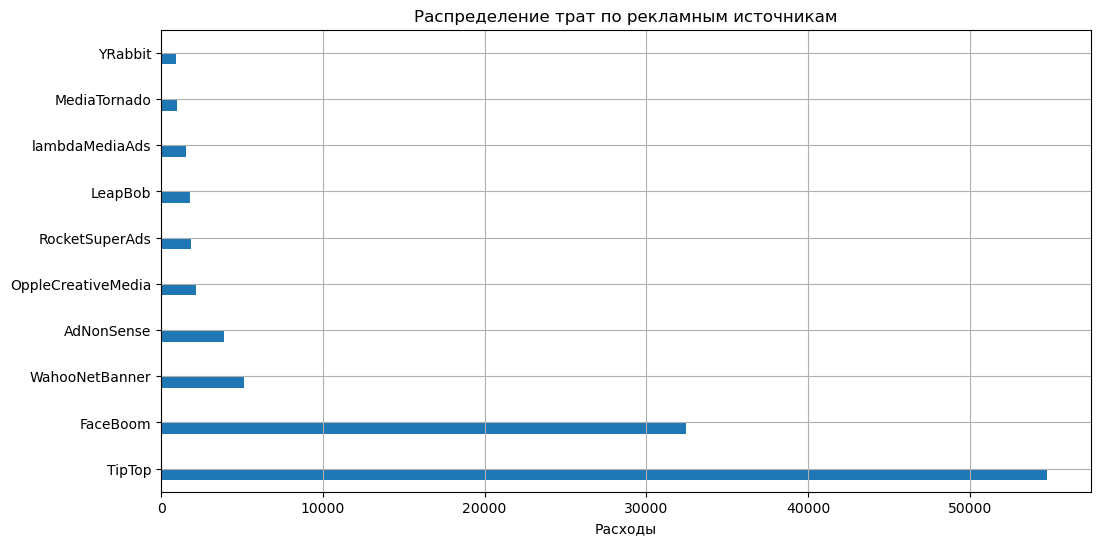

In [40]:
channel_costs.plot(kind= 'barh', figsize=(12,6), legend = False,  grid=True)
plt.xlabel('Расходы')
plt.ylabel('')
plt.title('Распределение трат по рекламным источникам')
plt.show()

### Визуализация динамики изменения расходов во времени

In [41]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

In [42]:
channel_costs_month = (costs.pivot_table(
                                         index = 'month',
                                         values = 'costs',
                                         aggfunc = 'sum',
                                         columns = 'channel'
                                        )
                      )

In [43]:
channel_costs_week = (costs.pivot_table(
                                         index = 'week',
                                         values = 'costs',
                                         aggfunc = 'sum',
                                         columns = 'channel'
                                        )
                      )

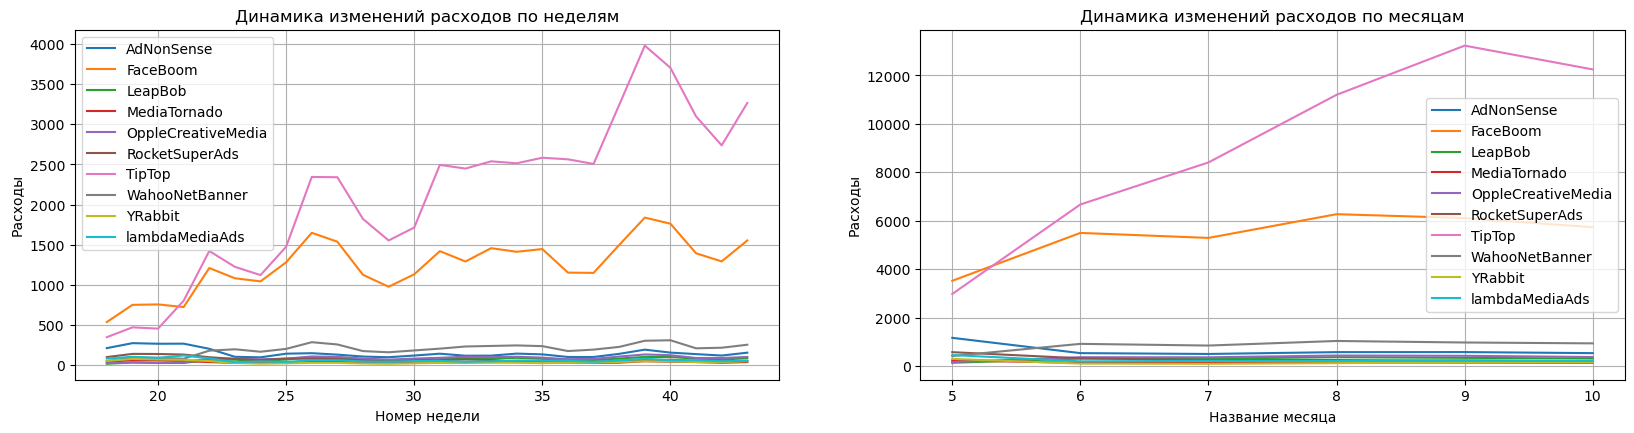

In [44]:
plt.figure(figsize=(20, 10))

ax = plt.subplot(2,2,1)
channel_costs_week.plot(grid = True, ax=ax)
plt.legend()
plt.ylabel('Расходы')
plt.xlabel('Номер недели')
plt.title('Динамика изменений расходов по неделям')

ax2 = plt.subplot(2,2,2)
channel_costs_month.plot(grid = True, ax=ax2)
plt.legend()
plt.ylabel('Расходы')
plt.xlabel('Название месяца')
plt.title('Динамика изменений расходов по месяцам')
plt.show()

Расходы на TipTop растут с каждым месяцем, расходы FaceBoom растут в июне и далее остаются примерно на одном уровне.Траты на остальные рекламные источники много меньше и остаются постоянными в течении всего периода наблюдения.

### Средняя стоимость привлечения пользователя для разных источников

In [45]:
cac_channel = (profiles.groupby('channel')
               .agg({'acquisition_cost':'mean'})
               .sort_values(by='acquisition_cost', ascending=False)
               .rename(columns={'acquisition_cost': 'cac'})
              )
cac_channel.style.format({'cac': '{:.2}'})

,cac
channel,
TipTop,2.8
FaceBoom,1.1
AdNonSense,1.0
lambdaMediaAds,0.72
WahooNetBanner,0.6
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [46]:
#средний cac: делим расходы на маркетинг на количество пользователей
cac_mean = total_costs/len(profiles)
round(cac_mean, 2)

0.7

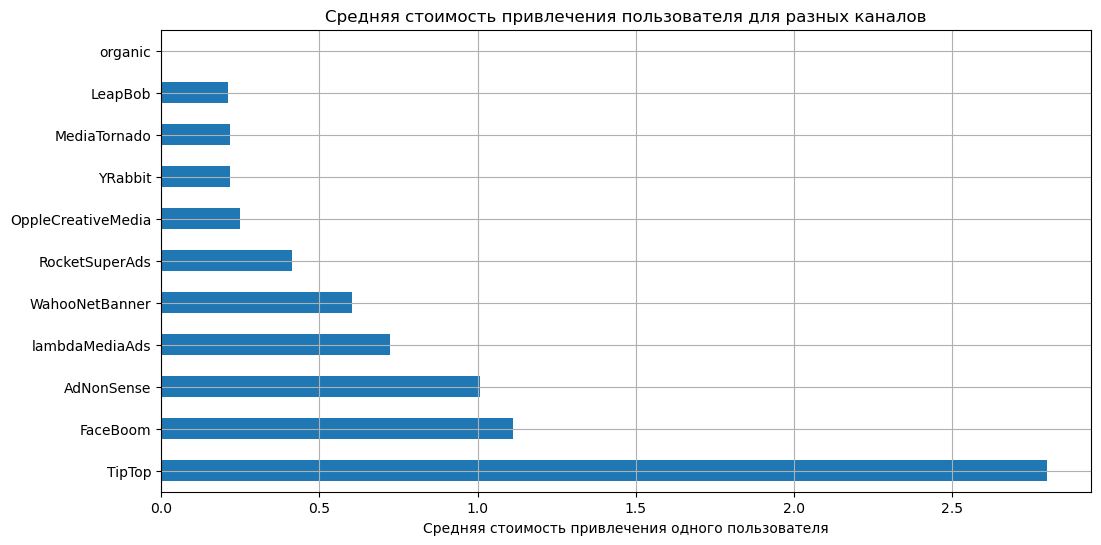

In [47]:
cac_channel.plot(kind= 'barh', figsize=(12,6), legend = False,  grid=True)
plt.xlabel('Средняя стоимость привлечения одного пользователя')
plt.ylabel('')
plt.title('Средняя стоимость привлечения пользователя для разных каналов')
plt.show()

In [48]:
#доля рекламных источников для разных регионов 
(
     profiles
     .pivot_table(index='channel',
                  columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .sort_values(by=('user_id', 'United States'), 
                  ascending=False)
 ).div(
     profiles
     .pivot_table(columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .values
 ).fillna(0).style.format('{:.2%}')

**Выводы по разделу:**
- общая сумма расходов на маркетинг 105497.3;
- наиболее дорогостоящим каналом привлечения пользователей является TipTop (2.8), однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.

## Оценка окупаемости рекламы

### Окупаемость рекламы

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi(). В бизнес заложено, что пользователи должны окупаться через 2 недели, поэтому возьмем горизонт анализа 14 дней.

In [49]:
#исключим органических пользователей
profiles = profiles.query('channel != "organic"')

In [50]:
observation_date = datetime(2019, 11, 1).date()
analysis_horizon = 14

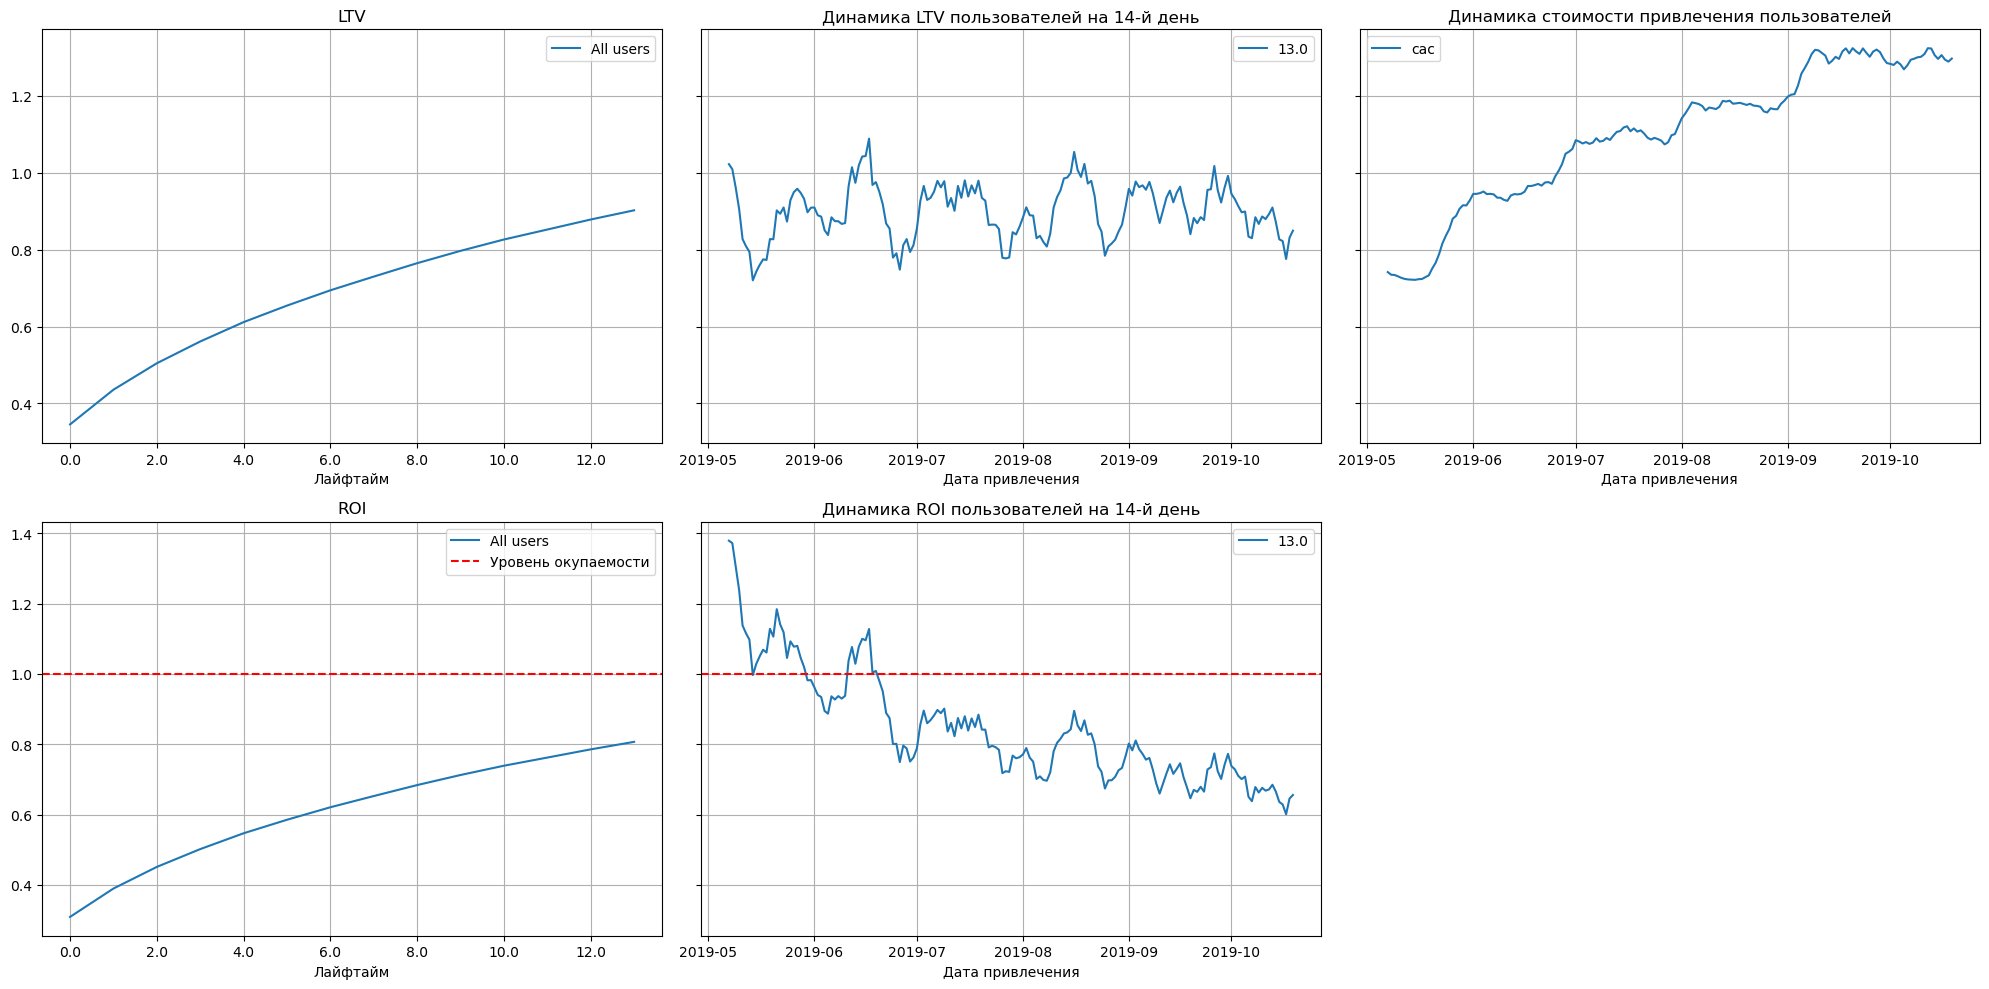

In [51]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Выводы:
- реклама не окупается, ROI к концу двух недель чуть выше 80%;
- CAC растет, увеличается бюджет на рекламные компании;
- ROI падает, в июне кривая падает ниже уровня окупаемости.

### Конверсия и удержание

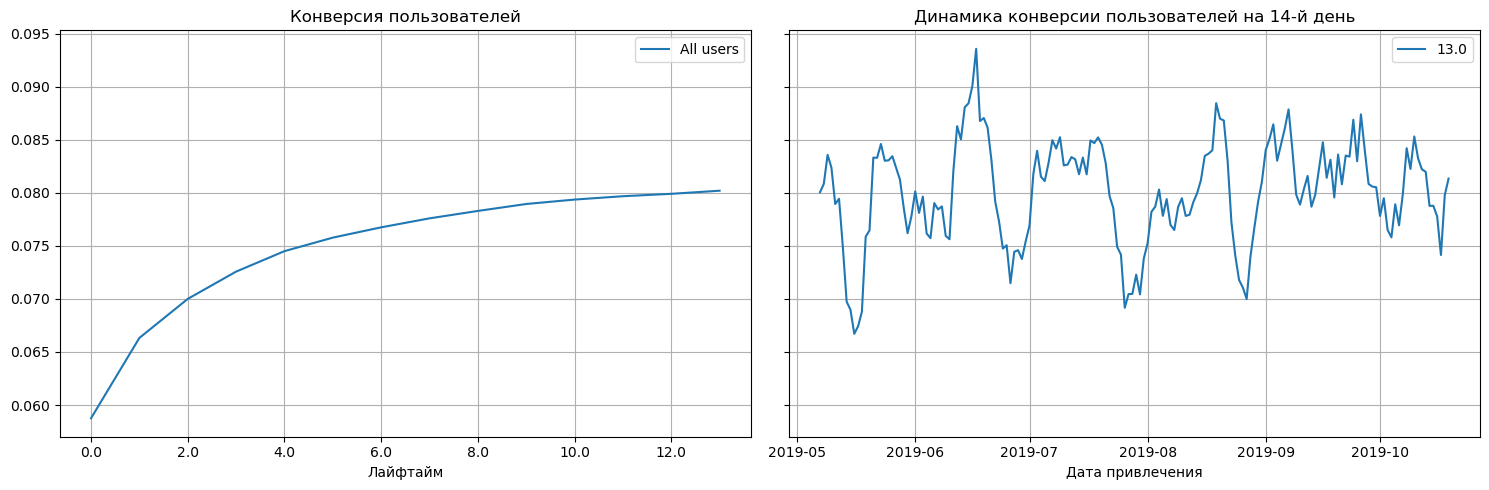

In [52]:
# смотрим конверсию
dimensions = []

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

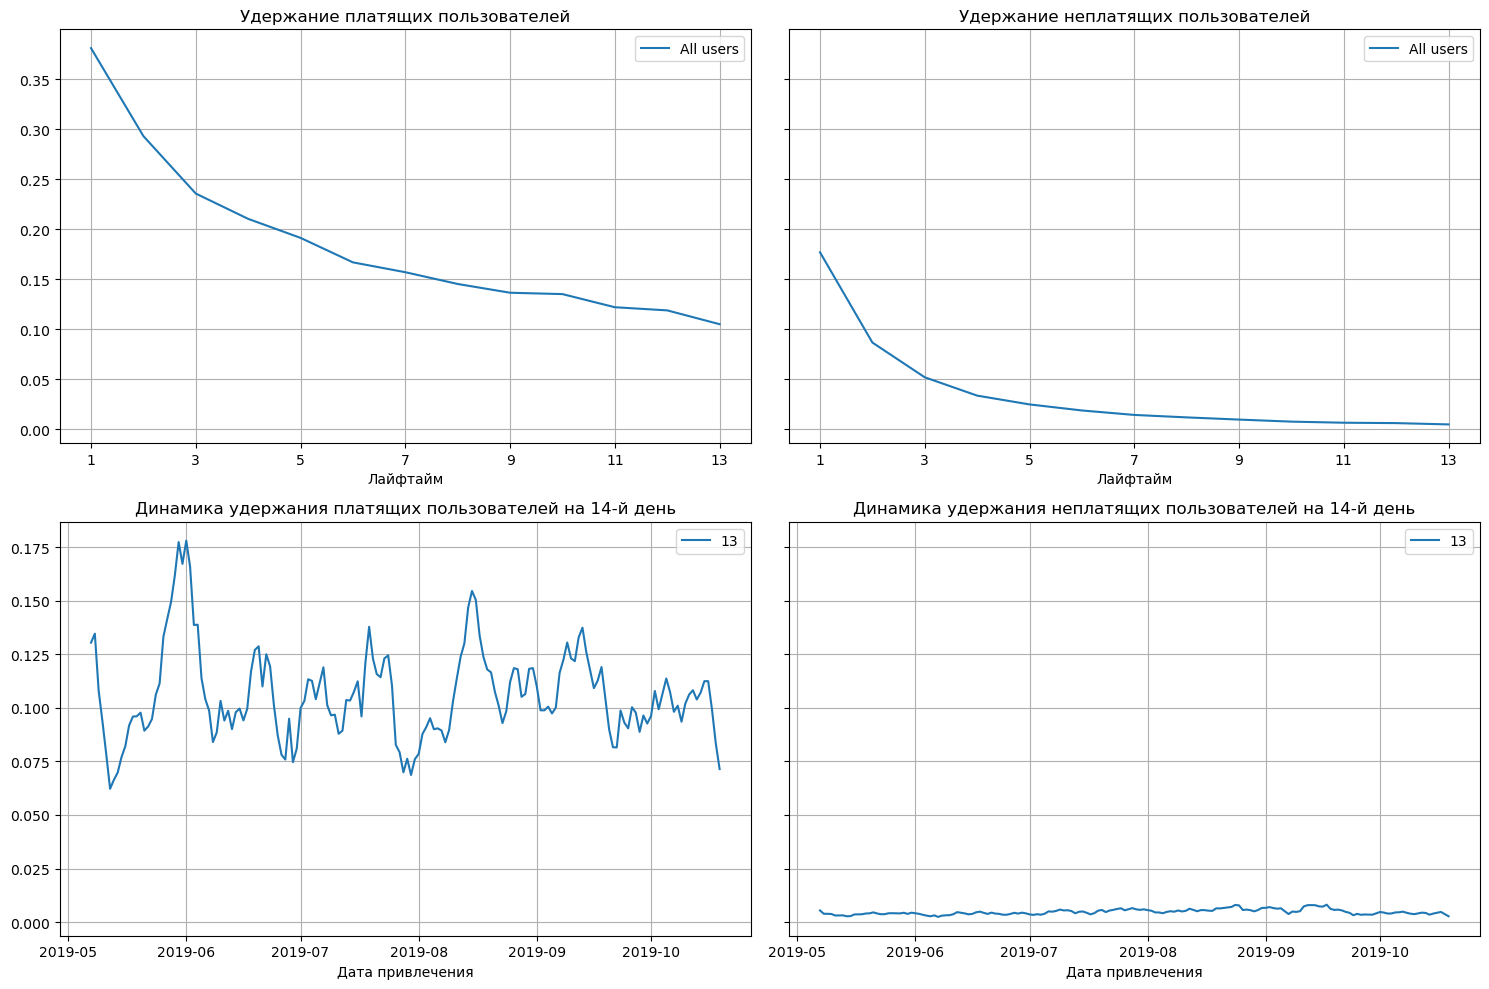

In [53]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Выводы:
- лучше всего пользователи конвертируются первые 4 дня;
- удержание платящих пользователей в первый день меньше 40%, к концу двух недель около 10%.

### Окупаемость рекламы с разбивкой по устройствам

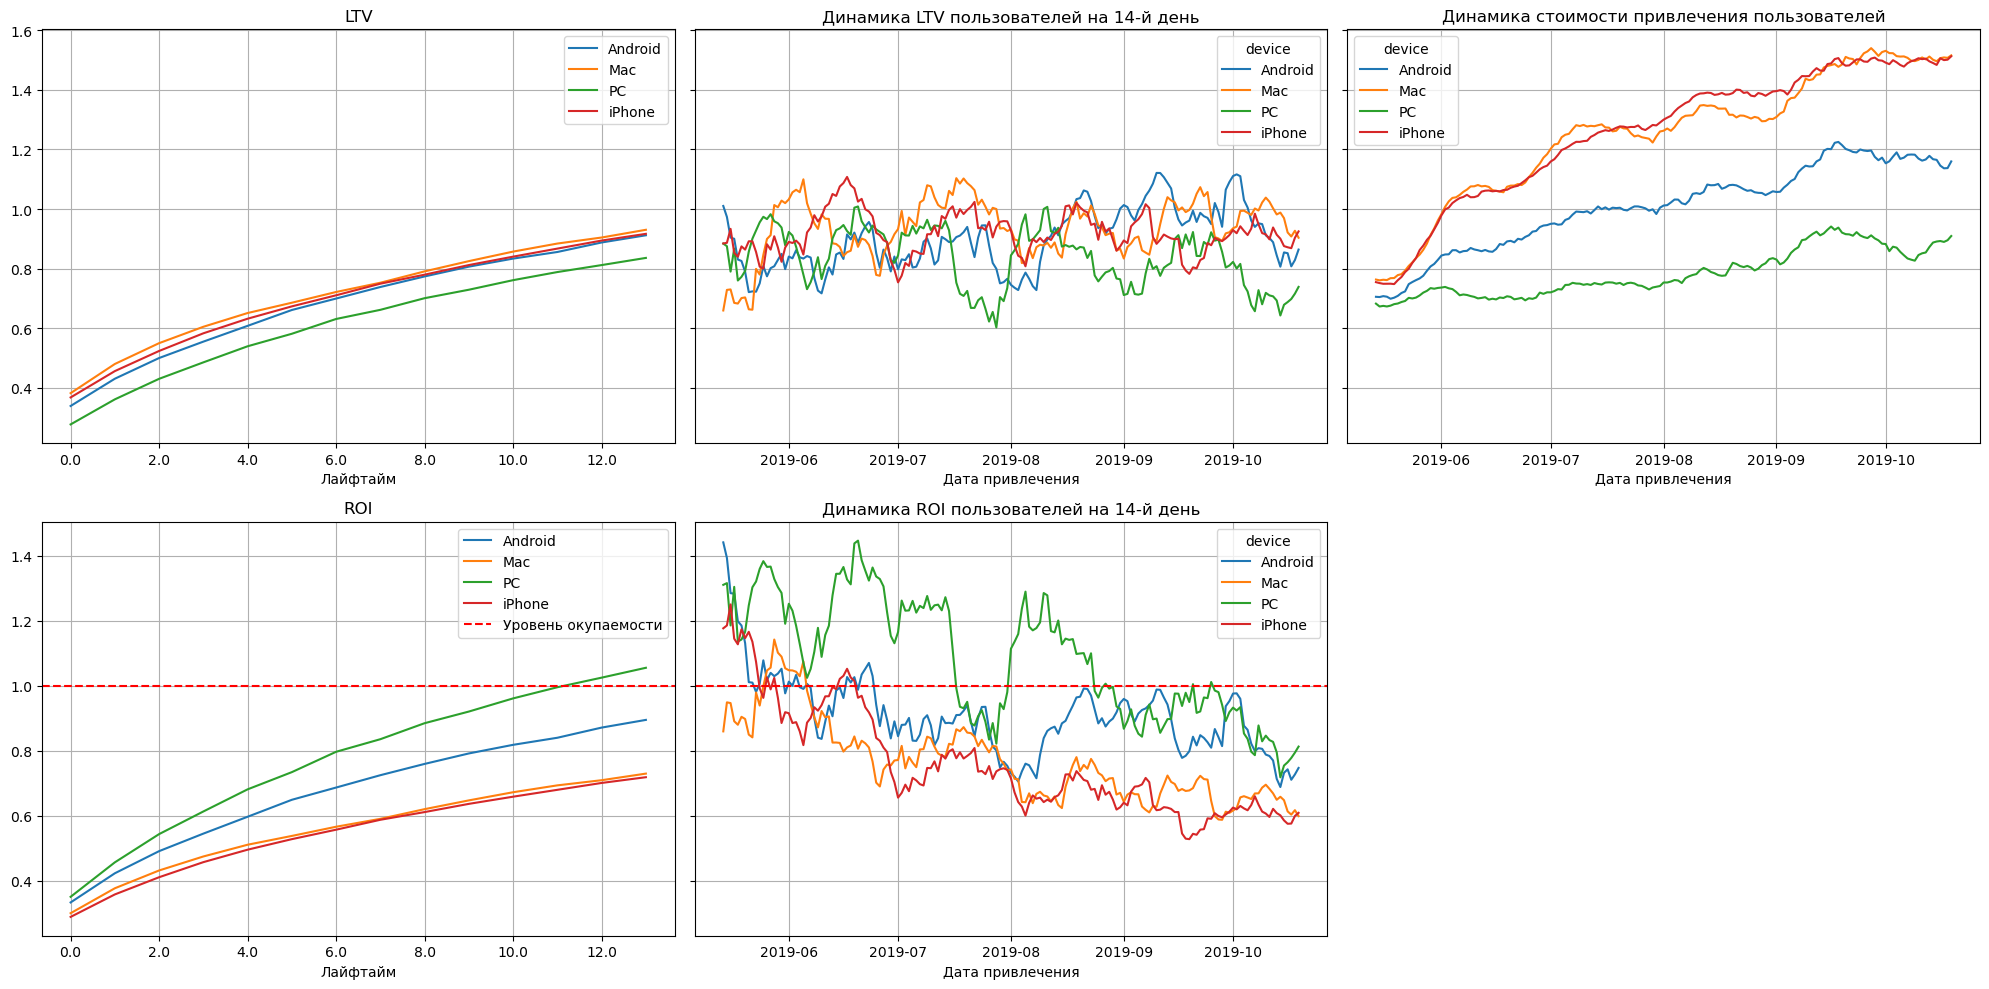

In [54]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Выводы:
- реклама окупается только для пользователей PC и то не каждый месяц, в сентябре и октябре реклама перестала окупаться;
- cтоимость привлечения пользователей растет, самый быстрый рост у  пользователей Mac и iPhone.

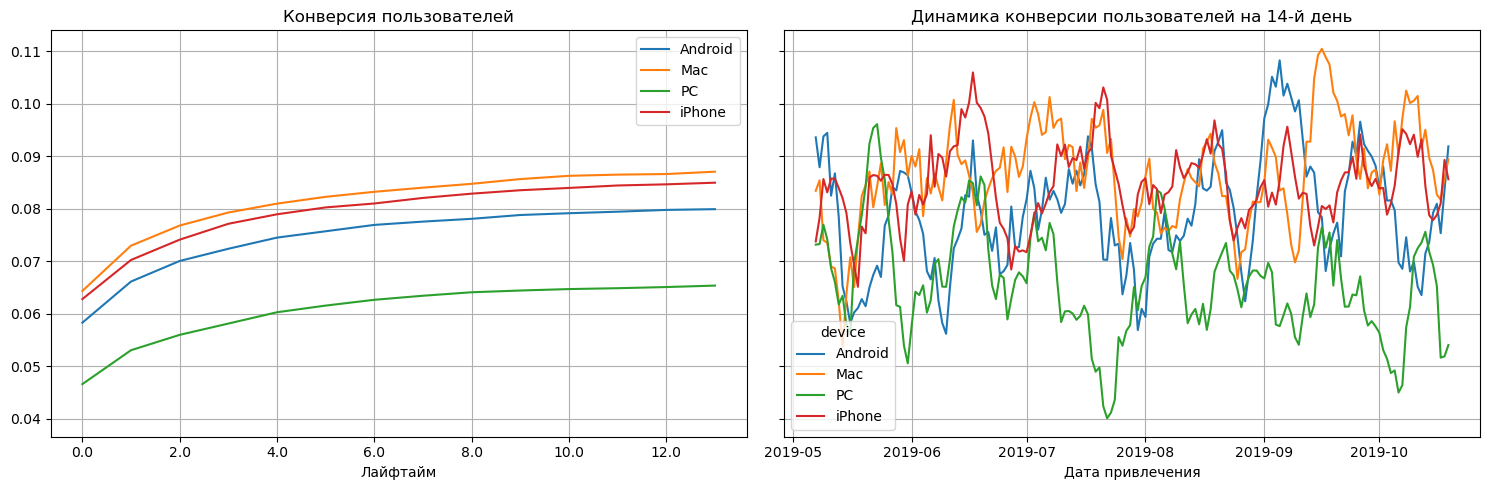

In [55]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

- Пользователи всех устройств конвентируются хорошо, чуть ниже показали у пользователей PC.

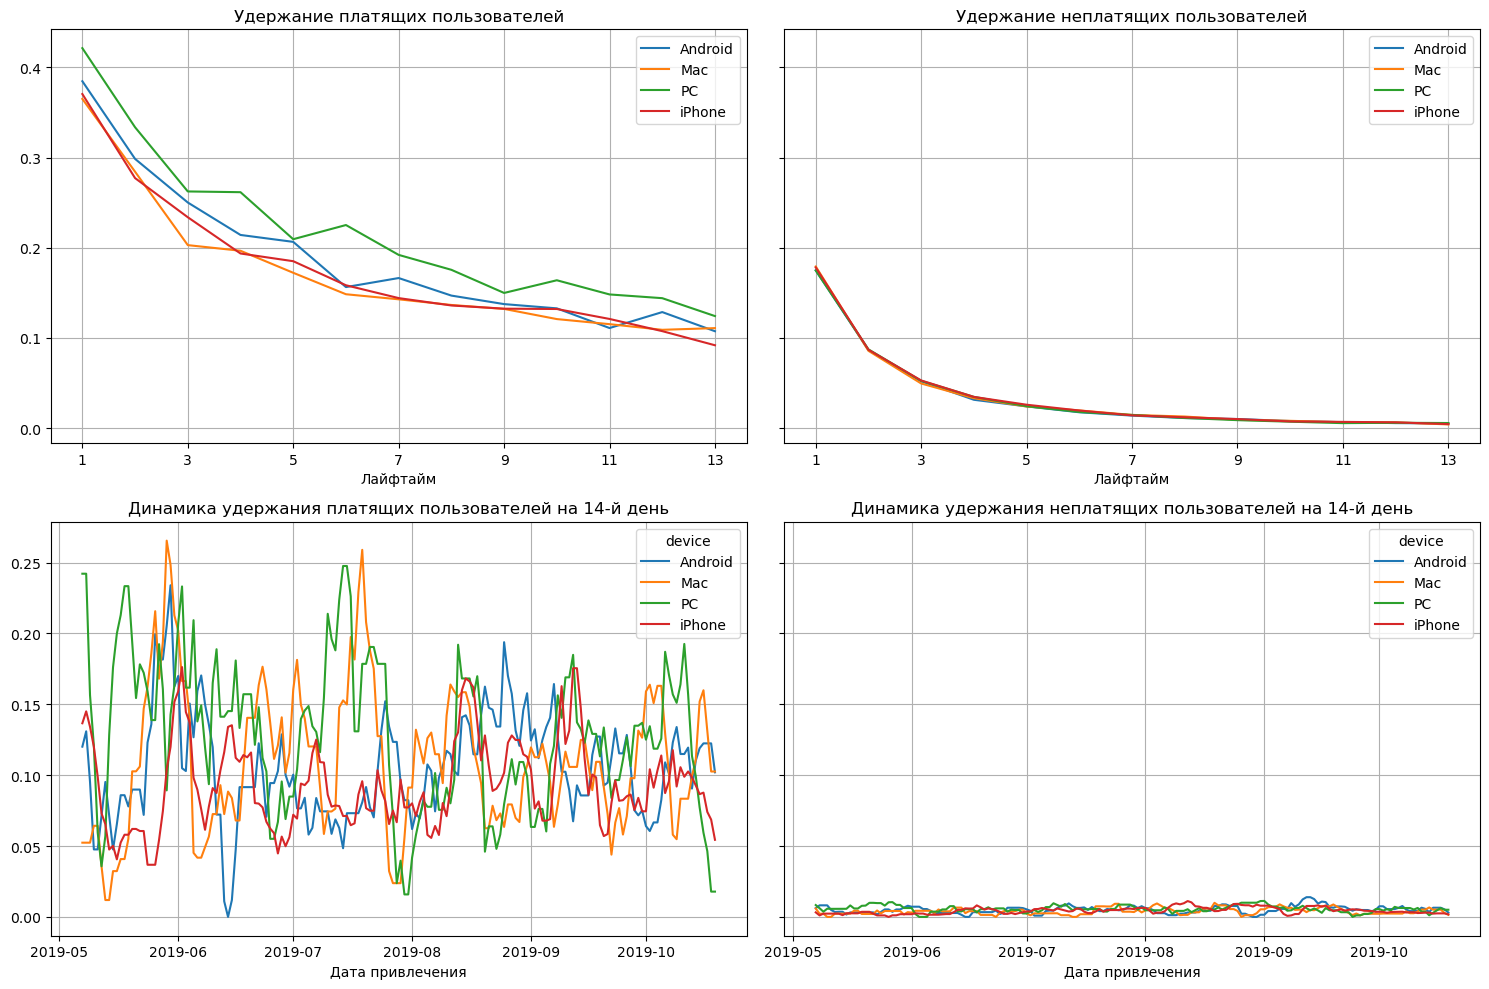

In [56]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon) 

- Платящие пользователи PC и Android удреживаются чуть лучше.

### Окупаемость рекламы с разбивкой по странам

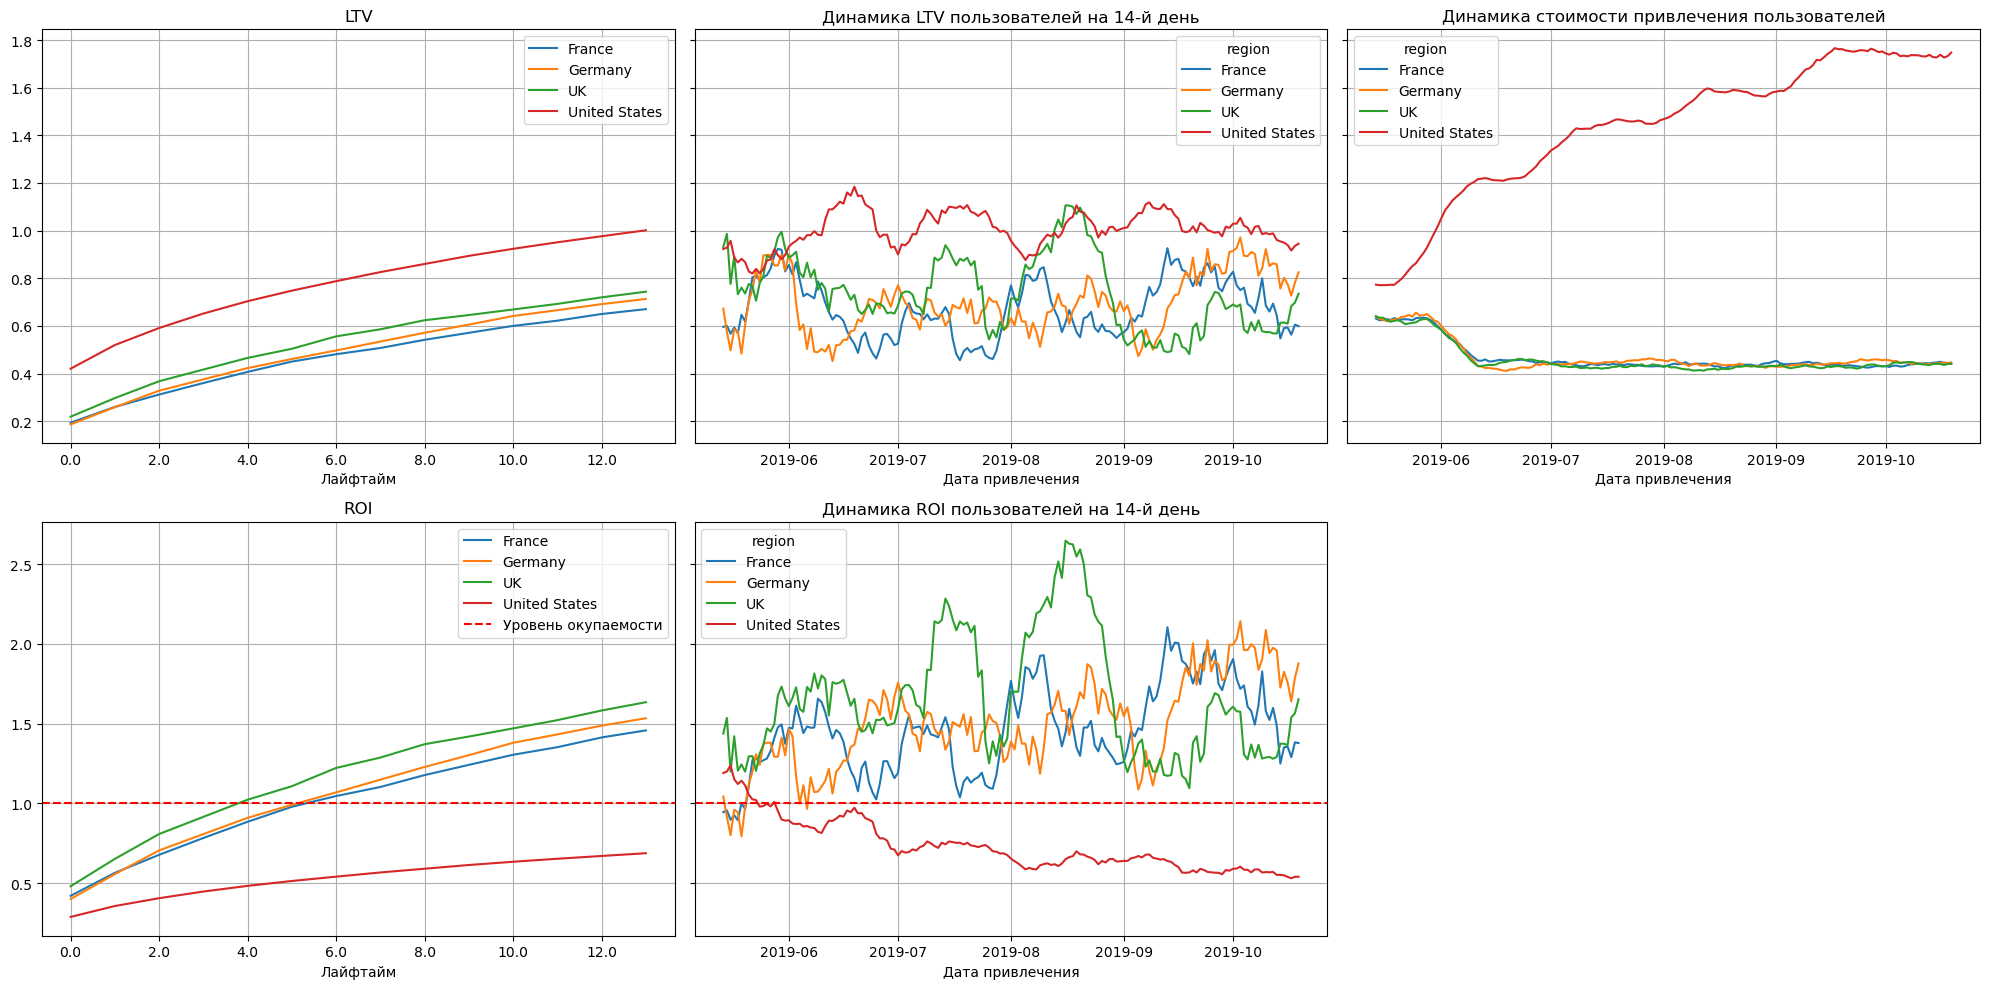

In [57]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
) 

Выводы:
- cтоимость привлечения для пользователей США растет каждый месяц;
- больше всего привлеченных пользователей из США, однако затраты на рекламу не окупаются;
- стоимость привлечения пользователей из Европы стабильна с середины июня;
- пользователи из Европы окупаются.

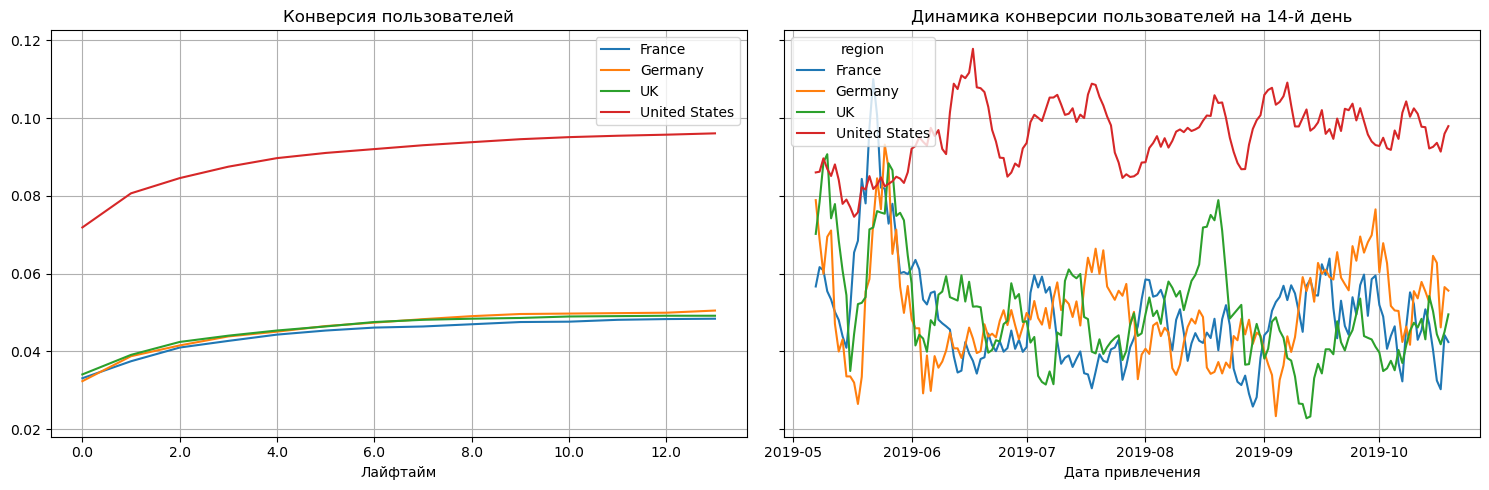

In [58]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

- Конверсия пользователей из США намного выше, чем в других регионах

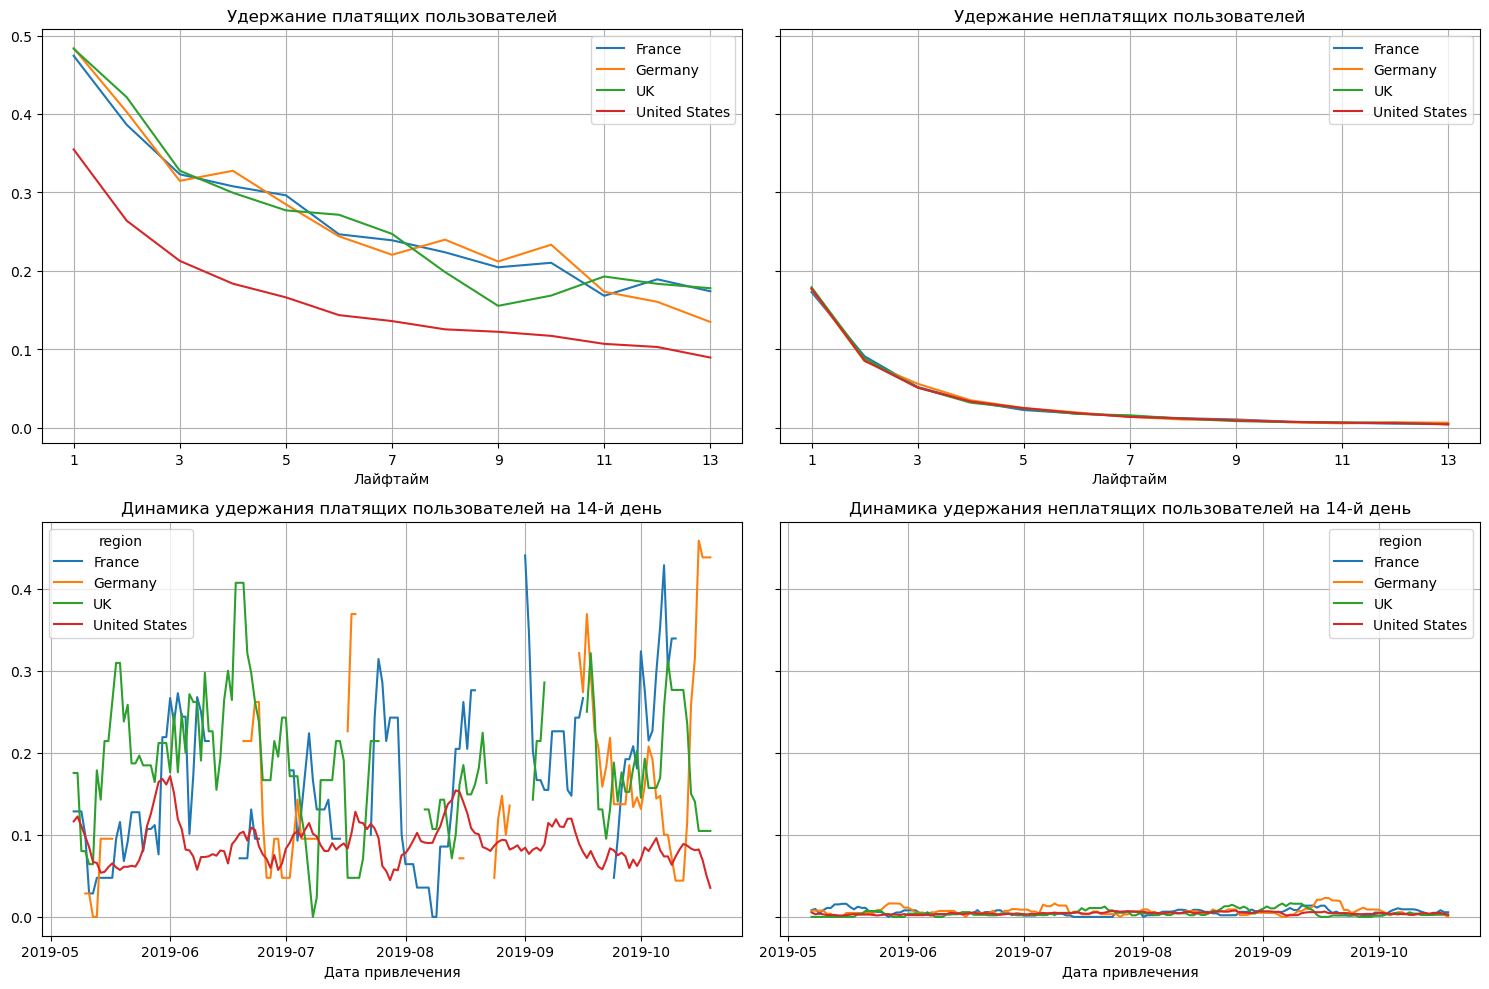

In [59]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon) 

Выводы:
- удержание платящих пользователей из США ниже, чем у пользователей из Европы;
- удержание неплатящих пользователей не различается в зависимости от регионов.

### Окупаемость рекламы с разбивкой по каналам

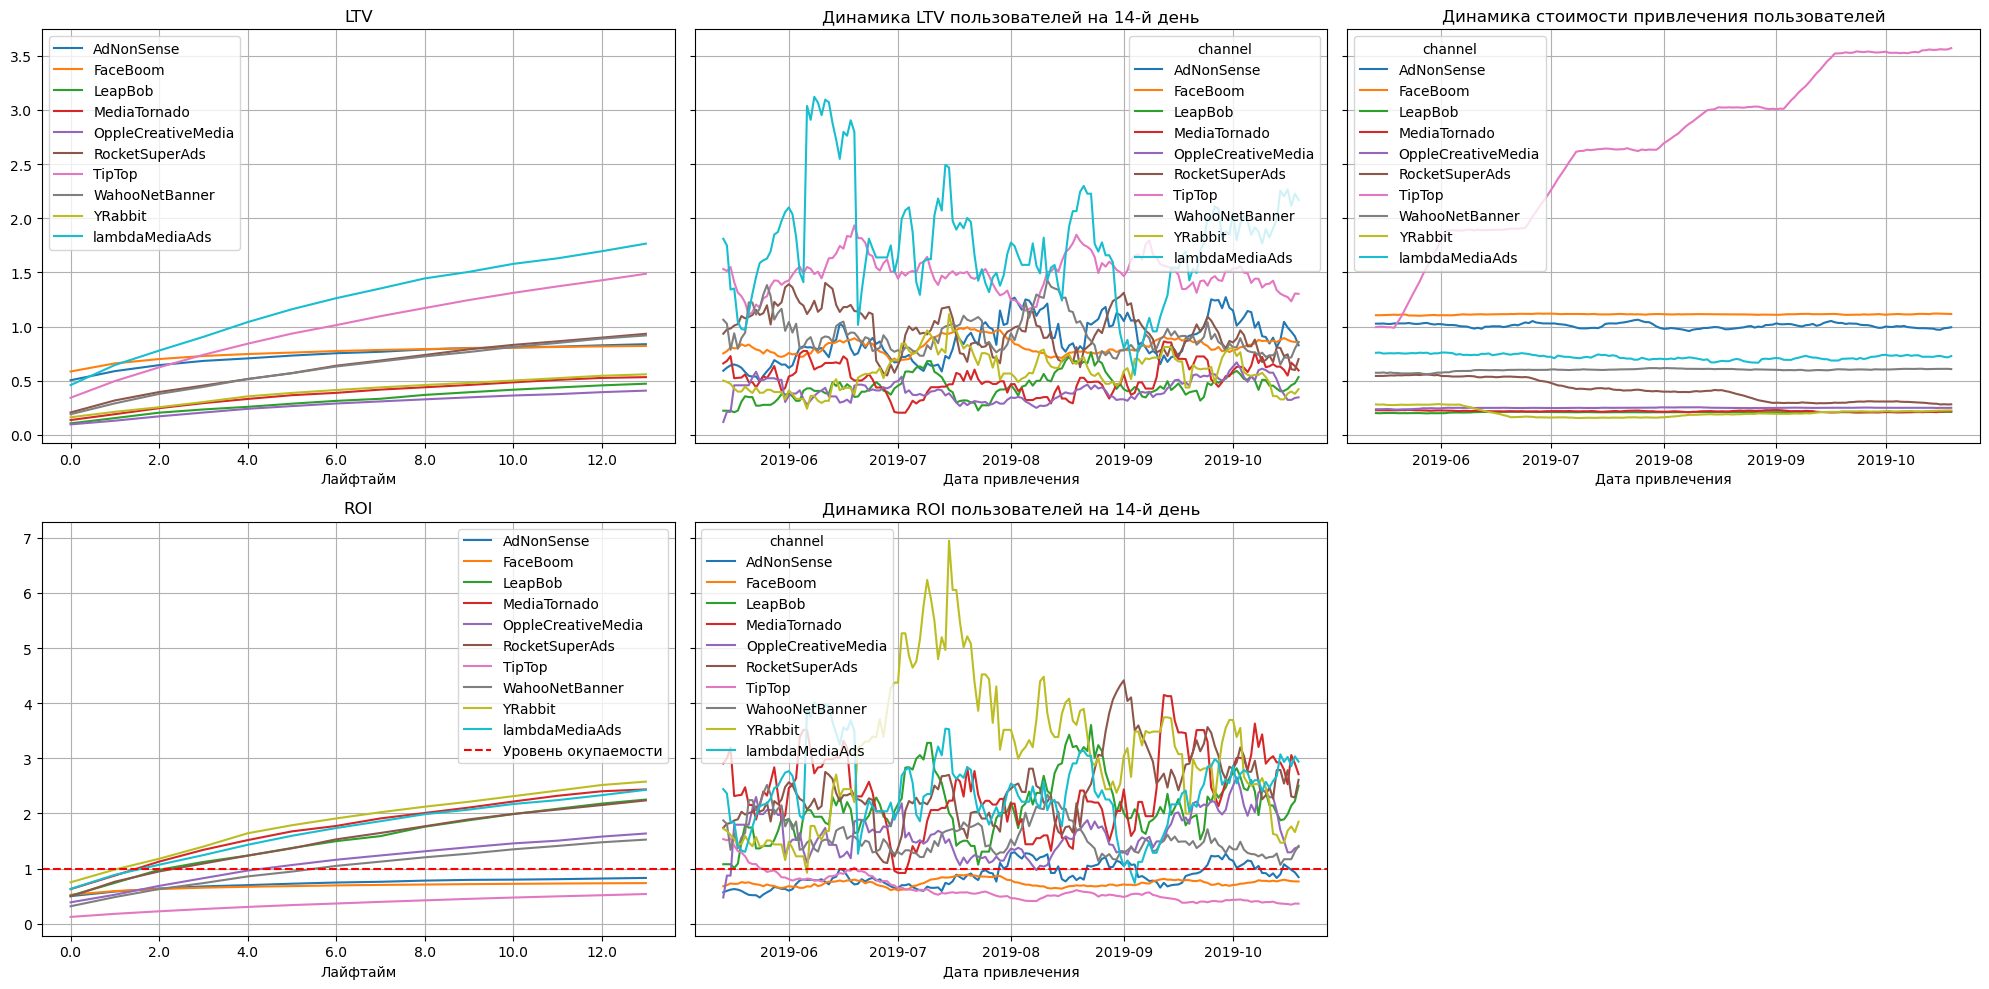

In [60]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
) 

Выводы:
- реклама для TipTop,FaceBoom, AdNonSence не окупается, что очень плохо, потому что на эти источники уходит большая часть рекламного бюджета;
- стоимость привлечения для TipTop растет;
- самые высокие показатели окупаемости у YRabbit, MediaTornado, IambdaMediaAds. При этом YRabbit, MediaTornado имеют низкий CAC,а IambdaMediaAds высокий 0.724802(4 место).

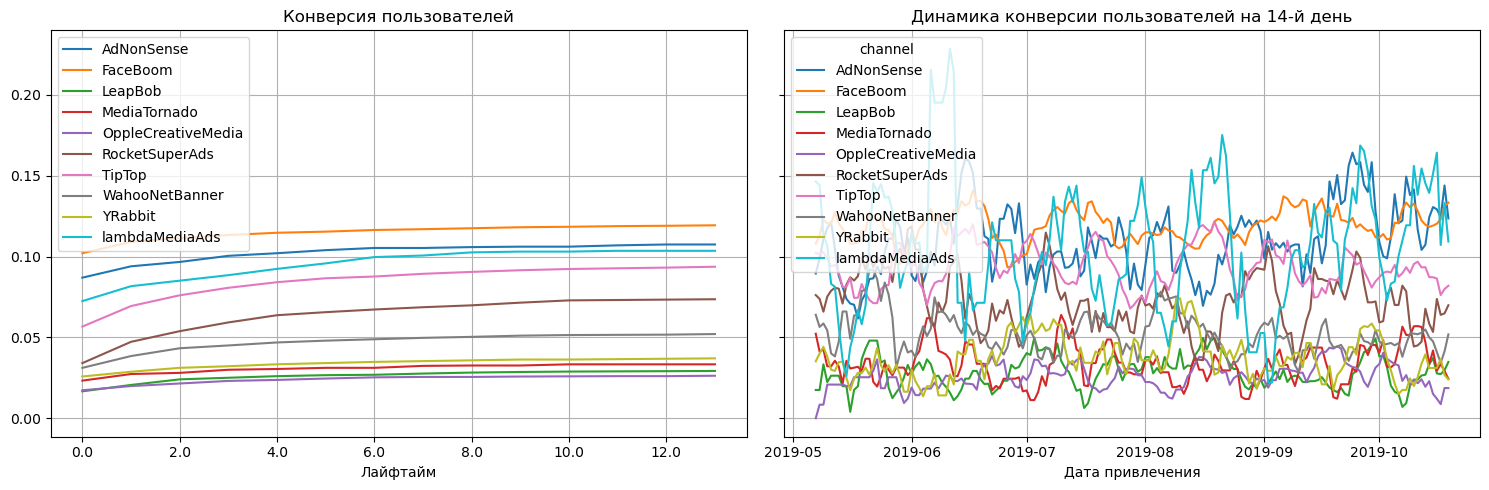

In [61]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

- Самая высокая конверсия у FaceBoom, AdNonSense, lamdaMediaAds и TipTop

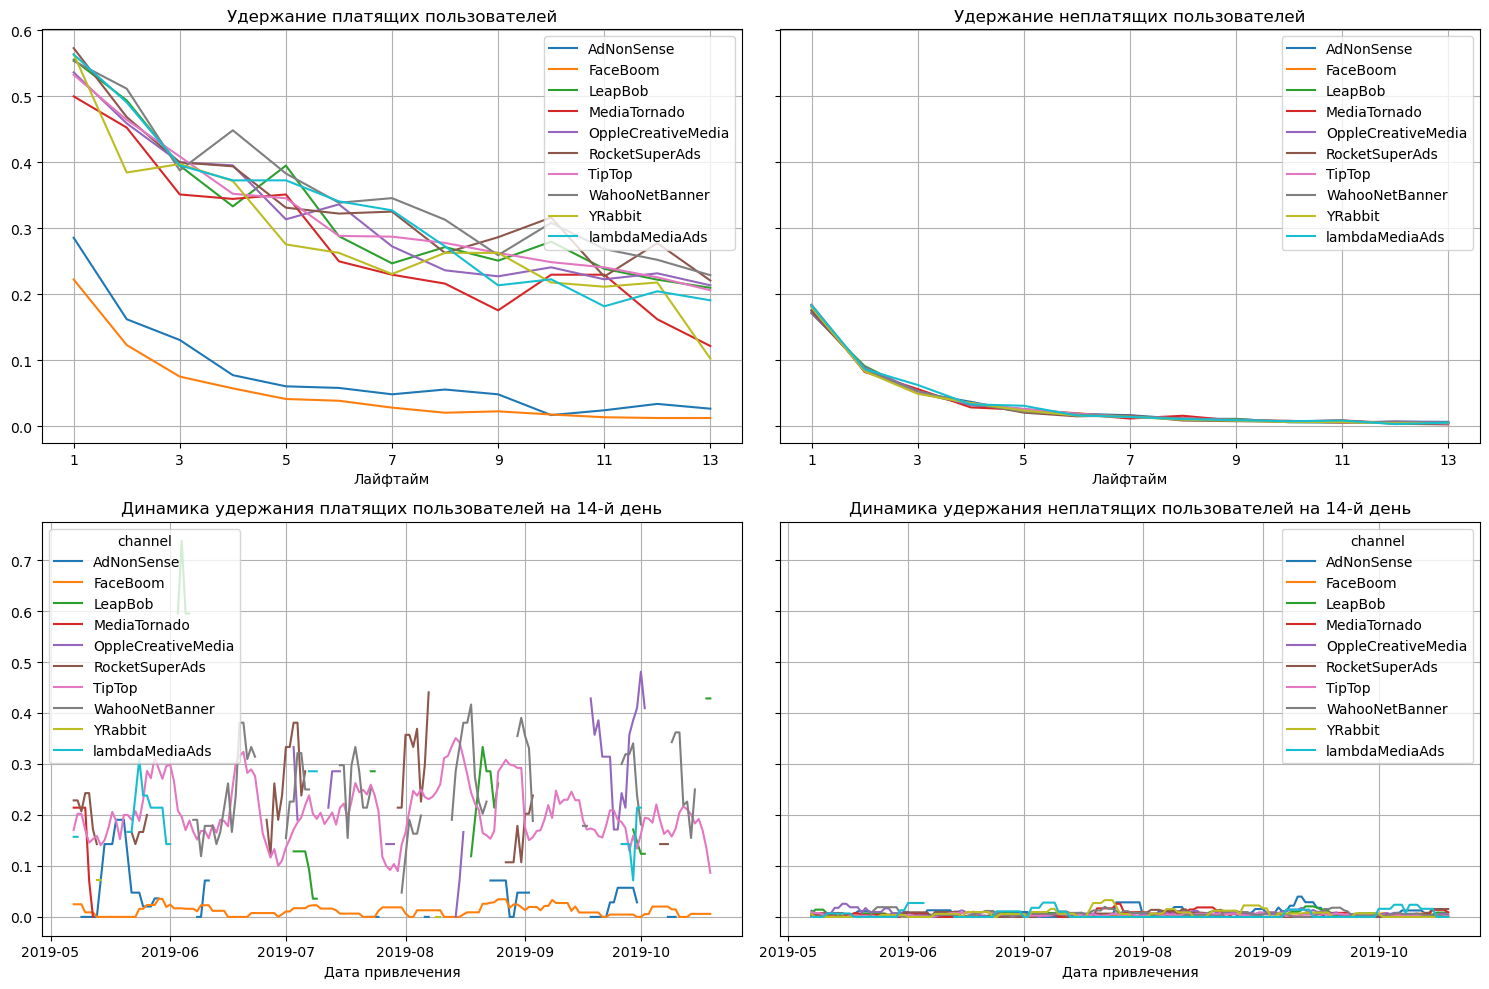

In [62]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon) 

- Очень низкое удержание платящих пользователей у платформ FaceBoom, AdNonSense, оно практически равно удеражнию неплатящих

**Выводы по разделу:**
- реклама, направленная на привлечение пользователей, не окупается. ROI к концу 14 дней чуть ниже 80%;
- негативное влияние на окупаемость рекламы могут оказывать пользователи MAC и iPhone, стоимость привлечения для этих пользователей растет,при этом удержание ниже, чем для других устройств;
- США имеет самую большую конверсию, но очень низкое удержание. Также стоимость привлечения пользователей из США постоянно растет и реклама не окупается;
- стоимость привлечения платформы Tip-Top постоянно растет и реклама не окупается;
- платформа FaceBoom и AdNonSense имеют очень плохое удержание.

**Рекомендации:**
- реклама, направленная на пользователей PC, окупается. Данных пользователей сложнее всего привлечь, но у них самое высокое удержание, значит это наиболее надежные пользователи, стоит обратить на них больше внимания;
- также стоит больше привлекать пользователей Android, они более стабильные, чем пользователи MAC и iPhone;
- стоит изменить стратегию с пользователями из США, возможно поискать другие каналы привлечения;
- найти альтернативу FaceBoom, уменьшить рекламные бюджеты для TipTop;
- тратить больше ресурсов на каналы, c хорошей конверсией и удержанием, реклама с которых окупается. К примеру, lambdaMediaAds.

## Общий вывод

Основной рынок развлекательного приложения Procrastinate Pro+ – США, также приложение представлено в трех странах Европы: Франции, Германии, Великобритании. Большая часть пользователи заходит с мобильных устройств. Самую высокую конверсию имеют пользовали MAC, далее идут пользователи iPhone,следовательно пользователи Apple имеют большую конверсию в покупателей, чем пользователи Android и PC.

50% рекламного бюджета было потрачено на источник TipTop, еще 30% на FaceBoom. Самая высокая стоимость привлечения пользователей у TipTop – 2.8, далее идет FaceBoom – 1.1, AdNonSense	– 1.0, lambdaMediaAds – 0.72, WahooNetBanner – 0.6. При этом средний CAC равняется 0.7.

В целом реклама не окупается, к концу лайфтайма ROI чуть выше 80%. В резутате работы были выделены основные причины неэффективности рекламы:

- реклама в США не окупается, это связано с ростом стоимости привлечения пользователей;
- половина рекламного бюджета уходит на платформу TipTop, с мая по ноябрь стоимость привлечения увеличилась в 3,5 раза;
- у платформ FaceBoom, AdNonSense самая высокая конверсия, но очень низкое удержание платящих пользователей.
    
Рекомендации для отдела маркетинга:

- для рынка США необходимо сократить бюджет для платформ FaceBoom и TipTop, обратить внимание на YRabbit, MediaTornado и поискать другие платформы;
- для европейского рынка попробовать сократить бюджет для AdNonSense и вложиться в другие платформы, к примеру  lambdaMediaAds.